In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [139]:
df=pd.read_csv('Holiday_Package.csv') #Importing of Dataset

In [140]:
df.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [141]:
df.shape

(872, 8)

In [142]:
df.drop('Unnamed: 0',axis=1,inplace=True) #Dropping of unwanted feature.

In [143]:
df.info() #Datatype of few columns are object datatype. We will going to treat those columns at later stage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [144]:
df.isnull().sum() #No null values present

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [145]:
df.duplicated().sum() #No duplicated values present

0

In [146]:
df.rename(columns={'Holliday_Package':'Holiday_Package'},inplace=True) #Renamed column

In [147]:
df['Holiday_Package'].value_counts()  #Not a class imbalance problem

no     471
yes    401
Name: Holiday_Package, dtype: int64

In [148]:
df['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [149]:
df['Salary'].value_counts()

46195     2
33357     2
39460     2
36976     2
40270     2
         ..
38352     1
119644    1
96072     1
115431    1
74659     1
Name: Salary, Length: 864, dtype: int64

In [150]:
df['age'].value_counts()

44    35
31    32
34    32
35    31
33    30
28    29
40    29
36    28
38    28
32    27
47    26
41    26
39    25
26    24
42    24
46    24
49    23
45    23
51    22
50    21
37    21
43    21
48    20
27    19
29    19
30    19
57    18
56    18
55    17
25    17
58    16
24    16
59    14
54    14
52    13
21    12
23    11
53    10
60    10
22     9
61     8
20     8
62     3
Name: age, dtype: int64

In [151]:
df['educ'].value_counts()

8     157
12    124
9     114
11    100
10     90
5      67
4      50
13     43
7      31
14     25
6      21
15     15
3      11
16     10
2       6
17      3
19      2
21      1
18      1
1       1
Name: educ, dtype: int64

In [152]:
df['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [153]:
df['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

In [154]:
df.describe()
#Salary column seems to be skewed and have some outliers. All the other columns are normally distributed mostly.
#Educ column has few outliers as well.

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

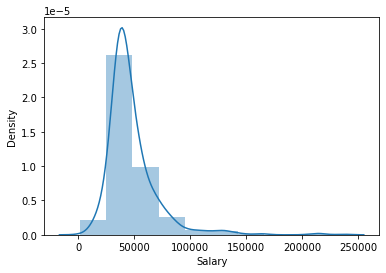

In [155]:
sns.distplot(df['Salary'],bins=10) #little skewed 

C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

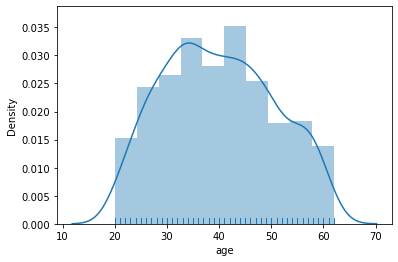

In [156]:
sns.distplot(df['age'],bins=10,rug=True) # The data looks to be normally distribued

C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='educ', ylabel='Density'>

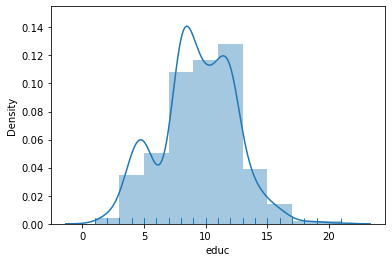

In [157]:
sns.distplot(df['educ'],bins=10,rug=True)           ## The data looks to be normally distribued

<AxesSubplot:xlabel='Holiday_Package', ylabel='age'>

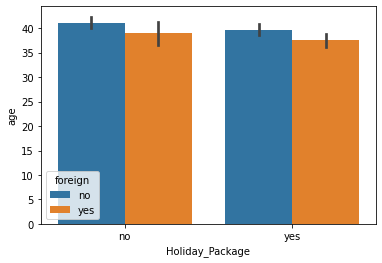

In [158]:
sns.barplot(y=df['age'],x=df['Holiday_Package'],hue=df['foreign'])
#Indian individuals have opted for holiday package more as compared to foreign individuals.Although the difference is very
#small

<AxesSubplot:xlabel='Holiday_Package', ylabel='educ'>

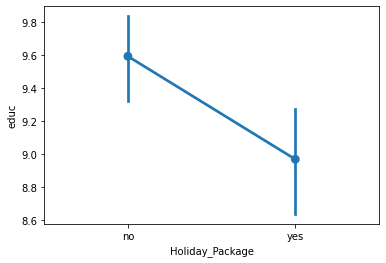

In [159]:
sns.pointplot(y=df['educ'],x=df['Holiday_Package'])
#The guys whose education is little less have opted for package more as compared to those who have higher education

<AxesSubplot:xlabel='Holiday_Package', ylabel='educ'>

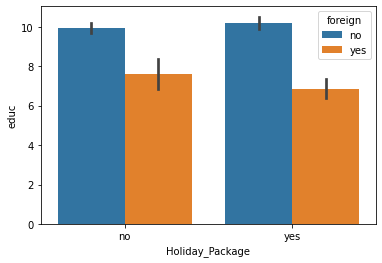

In [160]:
sns.barplot(y=df['educ'],x=df['Holiday_Package'],hue=df['foreign'])
#Out of all the customers, whose who have chosen the holiday package, most of them are non-foreigners

<AxesSubplot:xlabel='Holiday_Package', ylabel='no_young_children'>

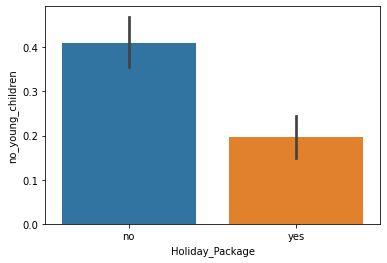

In [161]:
sns.barplot(y=df['no_young_children'],x=df['Holiday_Package'])
#People which have lower number of young children has opted for package more compared to those having greater number of
#children.

<AxesSubplot:xlabel='Holiday_Package', ylabel='no_older_children'>

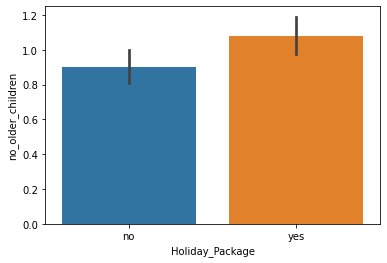

In [162]:
sns.barplot(y=df['no_older_children'],x=df['Holiday_Package'])
#People which have higher number of older children has opted for package more compared to those having smaller number of
# young children.

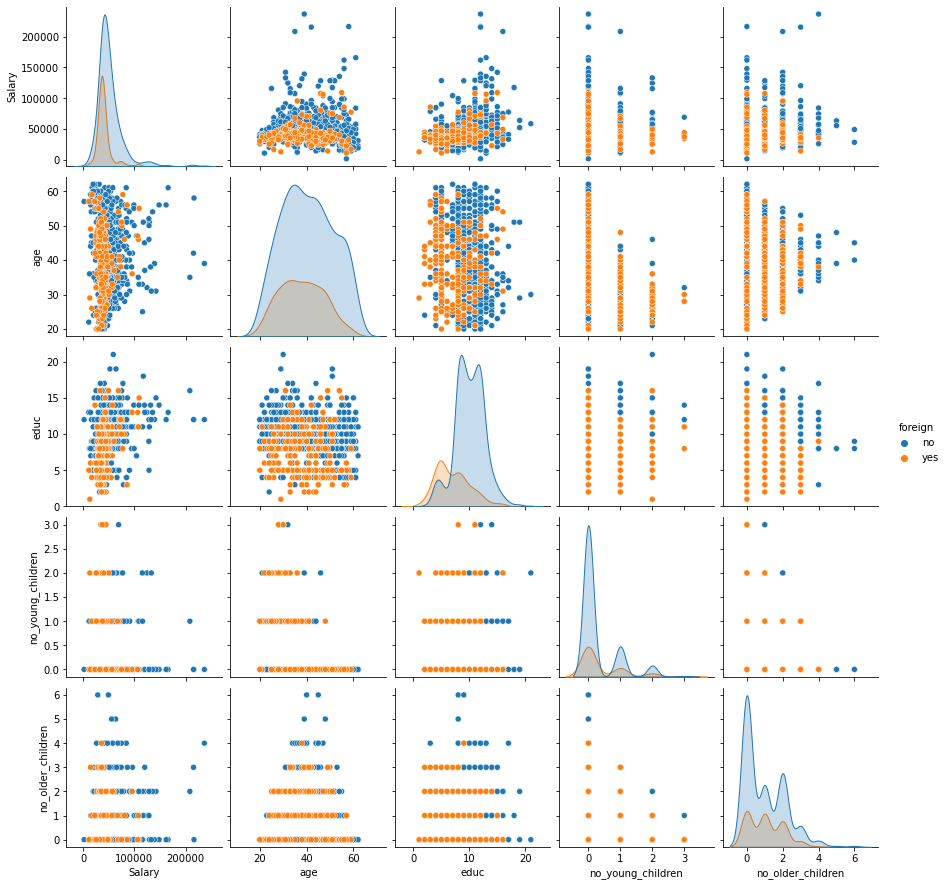

In [163]:
sns.pairplot(data=df, diag_kind='kde', hue='foreign')
#Eyeballing on the data,we see there's no such features which completely separate two required classes. There's an overlap
#between every features .But still features such as Salary and educ can be slightly useful for separating classes 

<AxesSubplot:>

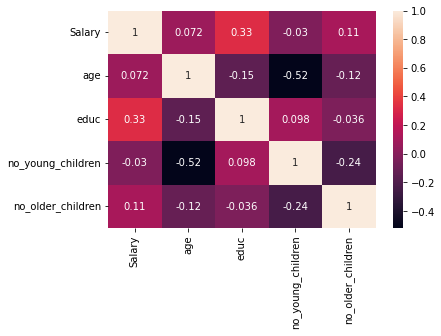

In [164]:
sns.heatmap(df.corr(),annot=True)
#No good correlations to be seen in a heatmap. 

In [165]:
df['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

In [166]:
df['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [167]:
df['no_older_children']=np.where(df['no_older_children'] > 2, '>2', df['no_older_children']  ) 
df['no_young_children']=np.where(df['no_young_children'] > 1, '>1', df['no_young_children']  ) 

#Creating a new category no_older_children > 2 and no_young_children > 1 as '>2' and '>1' respectively.

C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_older_children', ylabel='count'>

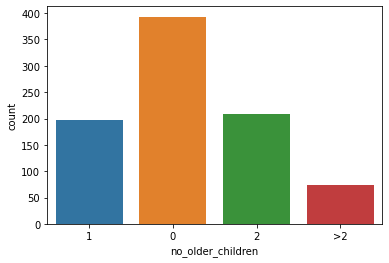

In [168]:
sns.countplot(df['no_older_children'])

C:\Users\Samsung\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_young_children', ylabel='count'>

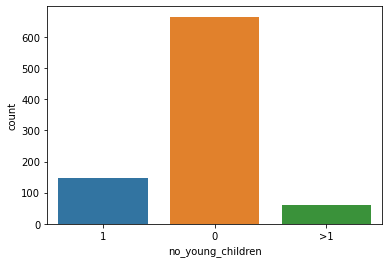

In [169]:
sns.countplot(df['no_young_children'])

In [170]:
df['Holiday_Package'].value_counts() #Not a class imbalance problem. And both the classes are equally represented

no     471
yes    401
Name: Holiday_Package, dtype: int64

In [171]:
df['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holiday_Package    872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    object
 5   no_older_children  872 non-null    object
 6   foreign            872 non-null    object
dtypes: int64(3), object(4)
memory usage: 47.8+ KB


<AxesSubplot:>

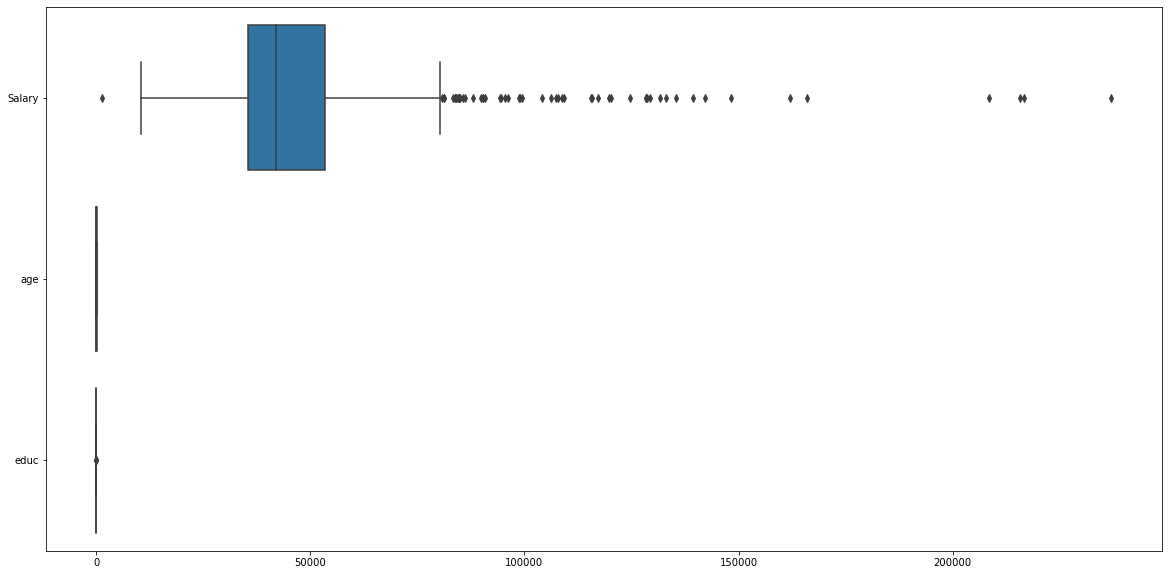

In [173]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,orient='h')
#Outliers are there.

In [174]:
def outlier_treatment(col):
    Q1,Q3=np.percentile(df[col],[25,75])
    IQR=Q3-Q1
    Qmax=Q3 + 1.5*IQR
    Qmin=Q1 - 1.5*IQR
    df[col]= np.where(df[col] > Qmax, Qmax, df[col] )
    df[col]= np.where(df[col] < Qmin, Qmin, df[col ] )

    #Defining a function to treat outliers

In [175]:
outlier_treatment('Salary')
outlier_treatment('educ')
#Treating outliers for features Salary and Educ only.

<AxesSubplot:>

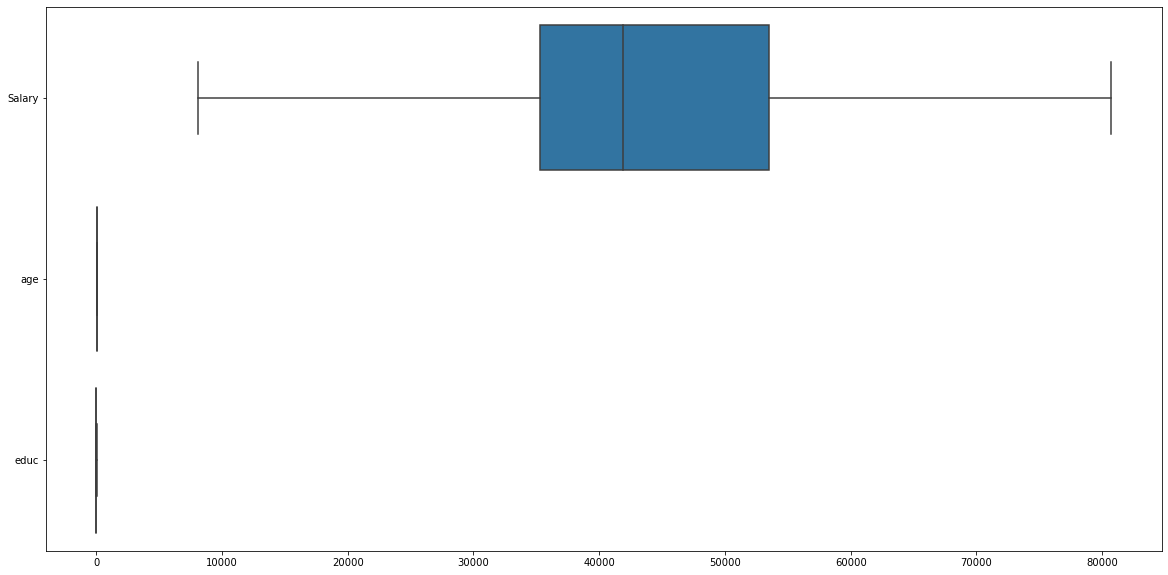

In [176]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,orient='h')
#No more outliers present

In [177]:
for col in df.columns: 
    if df[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df[col].unique()))
        print(pd.Categorical(df[col].unique()).codes)
        df[col] = pd.Categorical(df[col]).codes

        #Changing the datatype and assigning codes to each category.



Column Name: Holiday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


Column Name: no_young_children
['1', '0', '>1']
Categories (3, object): ['0', '1', '>1']
[1 0 2]


Column Name: no_older_children
['1', '0', '2', '>2']
Categories (4, object): ['0', '1', '2', '>2']
[1 0 2 3]


Column Name: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [178]:
df.info()
#Datatype succefully changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holiday_Package    872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    int8   
 5   no_older_children  872 non-null    int8   
 6   foreign            872 non-null    int8   
dtypes: float64(2), int64(1), int8(4)
memory usage: 24.0 KB


### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [179]:
X=df.copy()
X.drop('Holiday_Package',axis=1,inplace=True)
Y=df.pop('Holiday_Package')
#Creating new dataset containing IV and DV in it

In [180]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30,8.0,1,1,0
1,37207.0,45,8.0,0,1,0
2,58022.0,46,9.0,0,0,0
3,66503.0,31,11.0,2,0,0
4,66734.0,44,12.0,0,2,0


In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train,X_test,train_labels,test_labels,=train_test_split(X,Y,test_size=0.30,random_state=1)
#Spltting the data into training and testing dataset

In [183]:
clf=LogisticRegression()

In [184]:
clf.fit(X_train,train_labels)
#Fitting the Trained Model into training dataset

LogisticRegression()

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [185]:
ytrain_predict=clf.predict(X_train)
#Predicing using the model trained on training dataset

<AxesSubplot:>

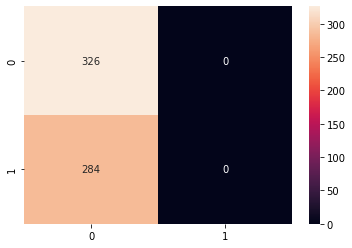

In [186]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='g')

In [187]:
print(classification_report(train_labels,ytrain_predict))
#Accuracy is poor. Along with it recall is very poor

              precision    recall  f1-score   support

           0       0.53      1.00      0.70       326
           1       0.00      0.00      0.00       284

    accuracy                           0.53       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.53      0.37       610



C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
ytest_predict=clf.predict(X_test)
#Predicting using X_test

<AxesSubplot:>

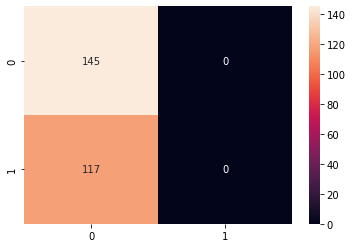

In [189]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='g')
#Number of False negative is very high . Which proves this model is not at all suitable as it incorrectly determines our
#potential customers.

In [190]:
print(classification_report(test_labels,ytest_predict))
#Poor results as that of testing dataset

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       145
           1       0.00      0.00      0.00       117

    accuracy                           0.55       262
   macro avg       0.28      0.50      0.36       262
weighted avg       0.31      0.55      0.39       262



C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Samsung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
from sklearn.metrics import roc_auc_score,roc_curve

In [192]:
probs1=clf.predict_proba(X_train)
probs1=probs1[:,1]
roc_auc_score(train_labels,probs1)

0.590966041648665

In [193]:
probs2=clf.predict_proba(X_test)
probs2=probs2[:,1]
roc_auc_score(test_labels,probs2)

0.6329501915708813

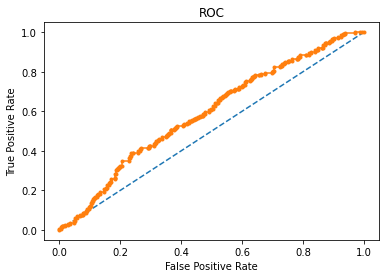

In [194]:
fpr,tpr,thresholds=roc_curve(train_labels,probs1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

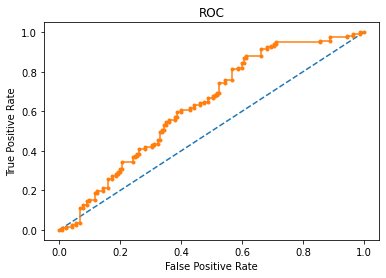

In [195]:
fpr,tpr,thresholds=roc_curve(test_labels,probs2)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

In [196]:
#AUC score is poor and ROC curve poorly plotted 

In [197]:
#Making of LDA model

lda=LinearDiscriminantAnalysis(tol=0.00001,solver='svd')
model=lda.fit(X_train,train_labels)
model 
#Fitting lda model on training data.

LinearDiscriminantAnalysis(tol=1e-05)

<AxesSubplot:>

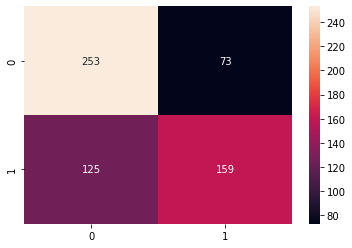

In [198]:
sns.heatmap(confusion_matrix(train_labels,model.predict(X_train)),annot=True,fmt='g')
#LDA performing comparatively better than Logistic Regression model

In [199]:
print(classification_report(train_labels,model.predict(X_train)))
#Accuracy,Recall is higher as compared to Logistic Model

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



<AxesSubplot:>

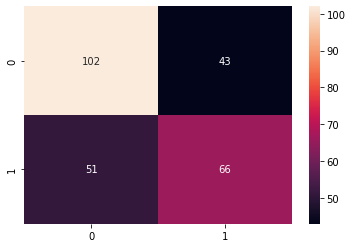

In [200]:
sns.heatmap(confusion_matrix(test_labels,model.predict(X_test)),annot=True,fmt='g')
#Confusion matrix for Testing data gives similar result as training data.

In [201]:
print(classification_report(test_labels,model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.67      0.70      0.68       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [202]:
probs1_lda=lda.predict_proba(X_train)
probs1_lda=probs1_lda[:,1]
roc_auc_score(train_labels,probs1_lda)
#roc_auc_score for training dataset

0.7441134537285059

In [203]:
probs2_lda=lda.predict_proba(X_test)
probs2_lda=probs2_lda[:,1]
roc_auc_score(test_labels,probs2_lda)
#roc_auc_score for testing dataset

0.7040377247273799

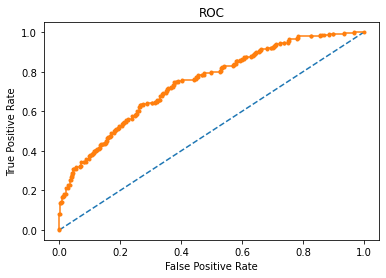

In [204]:
fpr,tpr,thresholds=roc_curve(train_labels,probs1_lda)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()
#ROC curve for Training set

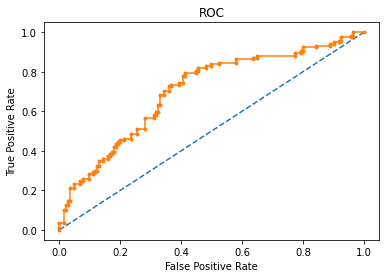

In [205]:
fpr,tpr,thresholds=roc_curve(test_labels,probs2_lda)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()
#ROC curve for Testing set

In [206]:
#AUC score is good and ROC curve is better plotted as compared to Logistic Model.


### Looking into all the important parameters such as Accuracy, Recall, AUC score and ROC curve , LDA is performing better as compared to Logistic Regression model

### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

#### 	INSIGHTS
	Looking into all the important parameters such as Accuracy, Recall, AUC score and ROC curve, LDA is performing better as compared to Logistic Regression mode.

	But the accuracy that we are getting is still not good to make any predictions. Hence we should try some more models such as neural networks, random forests to choose the optimum model for our predictions.

	We should try to gather some more data to make the model better and more robust.

	We can change outlier treatment techniques such as scaling the data and treating those values which are above and below +3 & -3 SD respectively. It was not done here as we were not asked to scale the data
